<a href="https://colab.research.google.com/github/DamodaraBarbosa/machine_learning_studies/blob/main/Rain_Australia_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [20]:
sns.set()

# Rain in Australia dataset

In [11]:
data = pd.read_csv('/content/drive/MyDrive/Kaggle/weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


* Dataset's dimensions:

In [5]:
f'Number of rows: {data.shape[0]}.'

'Number of rows: 145460.'

In [6]:
f'Number of columns: {data.shape[1]}.'

'Number of columns: 23.'

* Dataset's infos:

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# Data's description

## From Kaggle

Link: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package.

Context

Predict next-day rain by training classification models on the target variable RainTomorrow.

Content

This dataset contains about 10 years of daily weather observations from many locations across Australia.

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

Source & Acknowledgements

Observations were drawn from numerous weather stations. The daily observations are available from http://www.bom.gov.au/climate/data.
An example of latest weather observations in Canberra: http://www.bom.gov.au/climate/dwo/IDCJDW2801.latest.shtml

Definitions adapted from http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml
Data source: http://www.bom.gov.au/climate/dwo/ and http://www.bom.gov.au/climate/data.

Copyright Commonwealth of Australia 2010, Bureau of Meteorology.



## Columns meanings

From: http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml

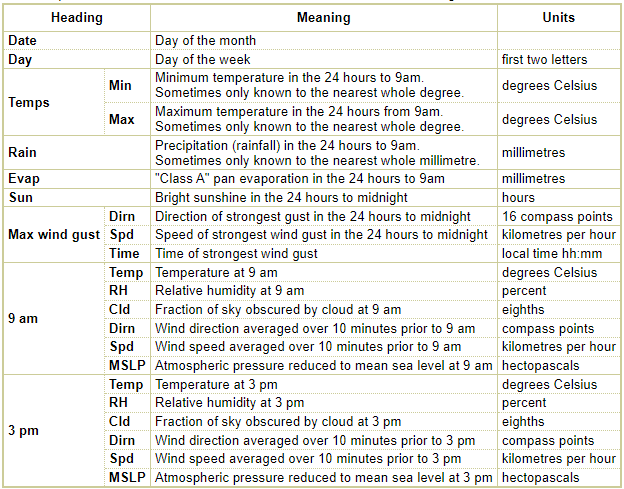

# Data analysis

## Missing values

In [8]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

## Column `Location`

In [16]:
f'There are {data["Location"].nunique()} different locations in dataset.'

'There are 49 different locations in dataset.'

The most shown locations are:

In [18]:
most_locations = data['Location'].value_counts()[:20]

In [33]:
fig = px.bar(
    x= most_locations.keys(), 
    y= most_locations.values, 
    title= 'The 20 most shown locations',
    labels= {'x': 'Locations', 'y': 'Count'}
)
fig.update_layout(width= 800, height= 800, title= {'x': 0.5})
fig.show()

## Column `MinTemp`

Some descriptive statistics:

In [35]:
data['MinTemp'].describe().round(2)

count    143975.00
mean         12.19
std           6.40
min          -8.50
25%           7.60
50%          12.00
75%          16.90
max          33.90
Name: MinTemp, dtype: float64

* Average `MinTemp` related to `RainTomorrow`:

In [41]:
data.groupby('RainTomorrow')['MinTemp'].mean().round(2)

RainTomorrow
No     11.90
Yes    13.19
Name: MinTemp, dtype: float64

In [82]:
most_min_locations = data.groupby('Location')['MinTemp'].mean().round(2).sort_values()

In [85]:
fig = make_subplots(rows= 1, cols= 2, subplot_titles= ['Locations with lower MinTemp', 'Locations with higher MinTemp'])

fig.add_trace(
    go.Bar(x= most_min_locations.keys()[:10], y= most_min_locations.values[:10]),
    row= 1, col= 1
)
fig.add_trace(
    go.Bar(x= most_min_locations.keys()[-10:], y= most_min_locations.values[-10:]),
    row= 1, col= 2
)
fig.update_layout(showlegend= False)
fig.update_yaxes(title_text= 'MinTemp (°C)', range= [0, 25], row= 1, col= 1)
fig.update_yaxes(title_text= 'MinTemp (°C)', row= 1, col= 2)

It's possible to observe that the minimum temperature on days with rain tends to be higher.

* Graph analysis:

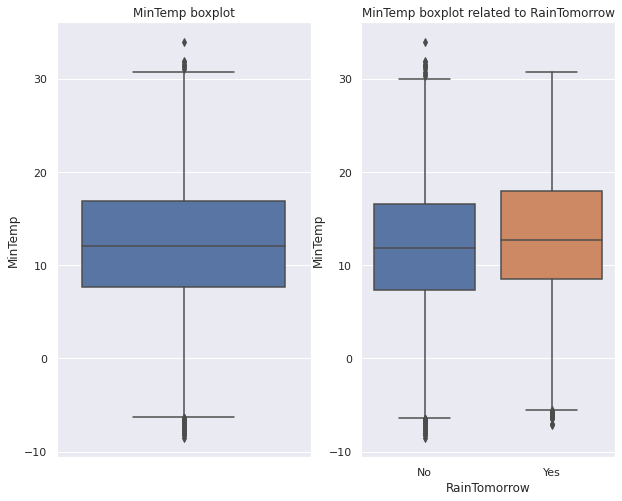

In [40]:
fig, axes = plt.subplots(1, 2, figsize= (10, 8))
ax1 = sns.boxplot(data= data, y= 'MinTemp', ax= axes[0])
ax1.set_title('MinTemp boxplot')
ax2 = sns.boxplot(data= data, x= 'RainTomorrow', y= 'MinTemp', ax= axes[1])
ax2.set_title('MinTemp boxplot related to RainTomorrow')
plt.show()

## Column `MaxTemp`

Some descriptive statistics:

In [44]:
data['MaxTemp'].describe()

count    144199.000000
mean         23.221348
std           7.119049
min          -4.800000
25%          17.900000
50%          22.600000
75%          28.200000
max          48.100000
Name: MaxTemp, dtype: float64

* Average `MaxTemp` related to `RainTomorrow`:

In [43]:
data.groupby('RainTomorrow')['MaxTemp'].mean().round(2)

RainTomorrow
No     23.84
Yes    21.12
Name: MaxTemp, dtype: float64

In [78]:
most_max_locations = data.groupby('Location')['MaxTemp'].mean().round(2).sort_values(ascending= False)

In [81]:
fig = make_subplots(rows= 1, cols= 2, subplot_titles= ['Locations with higher MaxTemp', 'Locations with lower MaxTemp'])

fig.add_trace(
    go.Bar(x= most_max_locations.keys()[:10], y= most_max_locations.values[:10]),
    row= 1, col= 1
)
fig.add_trace(
    go.Bar(x= most_max_locations.keys()[-10:], y= most_max_locations.values[-10:]),
    row= 1, col= 2
)
fig.update_layout(showlegend= False)
fig.update_yaxes(title_text= 'MaxTemp (°C)', row= 1, col= 1)
fig.update_yaxes(title_text= 'MaxTemp (°C)', range= [0, 35], row= 1, col= 2)

Days with rain tend to have less maximum temperature.

* Graph analysis

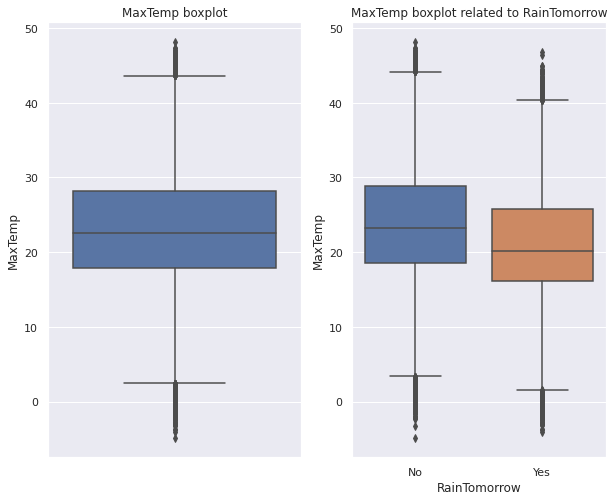

In [45]:
fig, axes = plt.subplots(1, 2, figsize= (10, 8))
ax1 = sns.boxplot(data= data, y= 'MaxTemp', ax= axes[0])
ax1.set_title('MaxTemp boxplot')
ax2 = sns.boxplot(data= data, x= 'RainTomorrow', y= 'MaxTemp', ax= axes[1])
ax2.set_title('MaxTemp boxplot related to RainTomorrow')
plt.show()

## Column `Rainfall`

Some descriptive statistics:

In [46]:
data['Rainfall'].describe()

count    142199.000000
mean          2.360918
std           8.478060
min           0.000000
25%           0.000000
50%           0.000000
75%           0.800000
max         371.000000
Name: Rainfall, dtype: float64

* Most and less rainfall locations:

In [73]:
most_rain_locations = data.groupby('Location')['Rainfall'].mean().round(2).sort_values(ascending= False)

In [54]:
from plotly.subplots import make_subplots

In [71]:
fig = make_subplots(rows= 1, cols= 2, subplot_titles= ['Most rainfall locations', 'Less rainfall locations'])

fig.add_trace(
    go.Bar(x= most_rain_locations.keys()[:10], y= most_rain_locations.values[:10]),
    row= 1, col= 1
)
fig.add_trace(
    go.Bar(x= most_rain_locations.keys()[-10:], y= most_rain_locations.values[-10:]),
    row= 1, col= 2
)
fig.update_layout(showlegend= False)
fig.update_yaxes(title_text= 'Rainfall (mm)', row= 1, col= 1)
fig.update_yaxes(title_text= 'Rainfall (mm)', range= [0, 6], row= 1, col= 2)

* Graph analysis

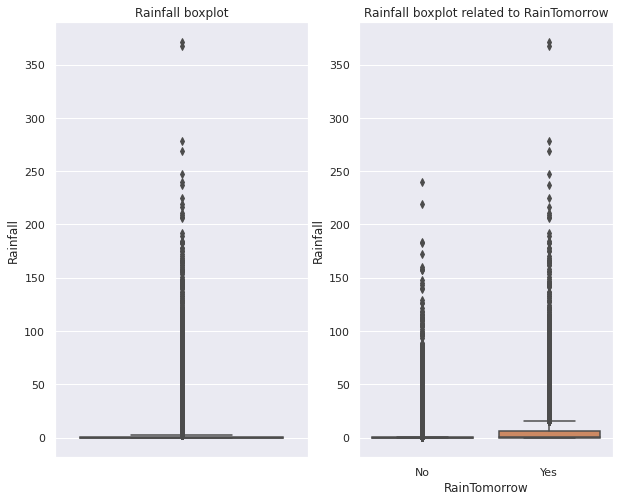

In [74]:
fig, axes = plt.subplots(1, 2, figsize= (10, 8))
ax1 = sns.boxplot(data= data, y= 'Rainfall', ax= axes[0])
ax1.set_title('Rainfall boxplot')
ax2 = sns.boxplot(data= data, x= 'RainTomorrow', y= 'Rainfall', ax= axes[1])
ax2.set_title('Rainfall boxplot related to RainTomorrow')
plt.show()

In [12]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')